# Module 1: Data Wrangling with Python

# **Exploratory Data Analysis on the  Fatal Police Shootings, 2015-Present Dataset**

## **Client: United States Department of Justice**

## **1. Introduction**

Fatal police shootings refer to incidents where police officers use deadly force resulting in the death of an individual. These shootings have gained significant attention and controversy in recent years, particularly in the United States, where there have been widespread protests and calls for police reform. The issue of fatal police shootings is a complex and multifaceted one, involving factors such as race, age, gender, mental illness, and geography. Understanding the patterns and trends of fatal police shootings is crucial in informing policies and practices that can prevent future incidents and ensure justice for victims and their families.



## **2. Data Loading**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

##  **2. Reading the Dataset**

In [ ]:
# Read first dataset and store in df1
# Dataset was gotten from kaggle https://www.kaggle.com/datasets/washingtonpost/police-shootings
df1 = pd.read_csv('/content/database.csv')

# Read second dataset and store in df2
# Dataset was gotten from kaggle https://www.kaggle.com/datasets/andrewmvd/police-deadly-force-usage-us
df2 = pd.read_csv('fatal-police-shootings-data.csv')

# Drop the rows up to index 2148
df2 = df2.drop(df2.index[0:2147])

# Concatenate the two datasets vertically
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### **Summary**

First, I uploaded the csv files into Google Colab. I created "df" variable after joining two dataset df1 and df2.

## **3. Examining and Understanding The Data**

After the dataset has been loaded, the next thing to do is examinng and understanding the data to get a better idea of what the data is all about.

In [ ]:
# Print the info of the data
print("Info:", df.info)

# Print the shape of the data
print("Shape:", df.shape)

# Print the column names
print("Columns:", df.columns)

# Print the data types of each column
print("Data Types:", df.dtypes)

# Print the summary statistics of the data
print("Cousera data Summary Statistics:\n", df.describe())

Info: <bound method DataFrame.info of         id                name        date   manner_of_death         armed  \
0        3          Tim Elliot  2015-01-02              shot           gun   
1        4    Lewis Lee Lembke  2015-01-02              shot           gun   
2        5  John Paul Quintero  2015-01-03  shot and Tasered       unarmed   
3        8     Matthew Hoffman  2015-01-04              shot    toy weapon   
4        9   Michael Rodriguez  2015-01-04              shot      nail gun   
...    ...                 ...         ...               ...           ...   
5328  5815               TK TK  2020-05-20              shot           gun   
5329  5836      Michael Snyder  2020-05-24              shot           gun   
5330  5837      Gary P. Dorton  2020-05-25              shot         knife   
5331  5839               TK TK  2020-05-25              shot           gun   
5332  5838  John Allen Dunaway  2020-05-26  shot and Tasered  undetermined   

       age gender race   

### **Summary**
The dataset has 5333 rows, and 14 columns

## **4. Data Cleaning**

Data Cleanning was carried out as follows

1. Handling the missing values of the dataset.

In [ ]:
# Check for missing values
df.isnull().sum()

id                           0
name                        19
date                         0
manner_of_death              0
armed                      109
age                        253
gender                       3
race                       616
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       255
body_camera                  0
dtype: int64

2. Handling the missing values

In [ ]:
# impute missing values for "age" using median imputation
age_median = df['age'].median()
df['age'] = df['age'].fillna(age_median)

# impute missing values for "armed" using mode imputation
armed_mode = df['armed'].mode()[0]
df['armed'] = df['armed'].fillna(armed_mode)

# impute missing values for "gender" using mode imputation
gender_mode = df['gender'].mode()[0]
df['gender'] = df['gender'].fillna(gender_mode)

# impute missing values for "race" using mode imputation
race_mode = df['race'].mode()[0]
df['race'] = df['race'].fillna(race_mode)

# impute missing values for "flee" using mode imputation
flee_mode = df['flee'].mode()[0]
df['flee'] = df['flee'].fillna(flee_mode)

# Check for missing values
df.isnull().sum()

id                          0
name                       19
date                        0
manner_of_death             0
armed                       0
age                         0
gender                      0
race                        0
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                        0
body_camera                 0
dtype: int64

### **Summary**

I used the Imputation method as an approach to handle the missing values and to impute the missing data using appropriate methods. The dataset contains missing values in the 'name' column, with 19 individuals having an unknown name. Since each person's name is unique and important for identification, it may not be appropriate to impute missing values for this column.

3. Removing duplicates

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

4. Treating the outliers:

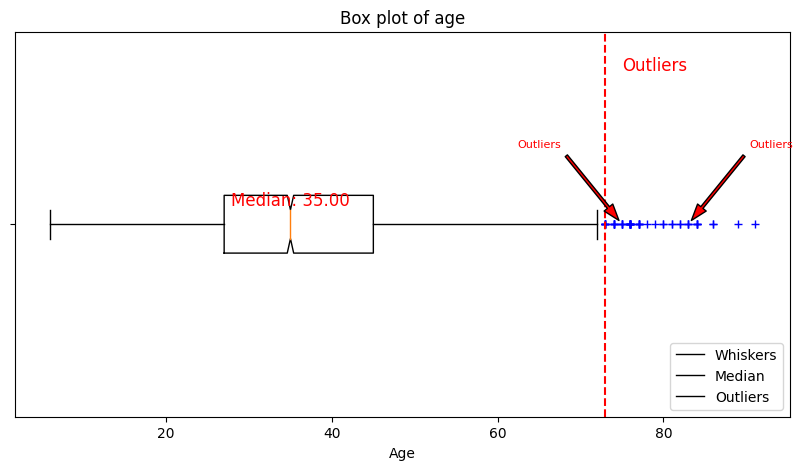

In [ ]:
#Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10, 5))

#Create box plot for the age variable
ax.boxplot(df['age'], vert=False, notch=True, sym='b+')
ax.set_title("Box plot of age")
ax.set_xlabel("Age")
ax.set_yticklabels('') # hide the y-axis labels
ax.annotate("Median: {:.2f}".format(df['age'].median()),
xy=(df['age'].median(), 1.05),
ha='center', fontsize=12, color='r')
ax.annotate("Outliers", xy=(75, 1.4), fontsize=12, color='r')
ax.axvline(x=73, ymin=0, ymax=1, color='r', linestyle='--')

#Increase the arrow size
arrowprops = dict(facecolor='red', shrink=0.05, width=2, headwidth=8)

ax.annotate("Outliers", xy=(75, 1), xytext=(65, 1.2), ha='center', fontsize=8, color='red',
arrowprops=arrowprops)
ax.annotate("Outliers", xy=(83, 1), xytext=(93, 1.2), ha='center', fontsize=8, color='red',
arrowprops=arrowprops)

ax.legend(['Whiskers', 'Median', 'Outliers'], loc='lower right')

plt.show()

## **5. Exploratory Data Analysis**

### **5.1  What is the number of fatal shootings by race**

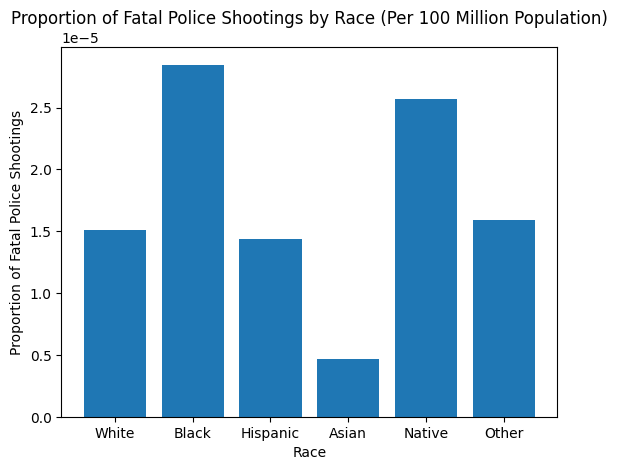

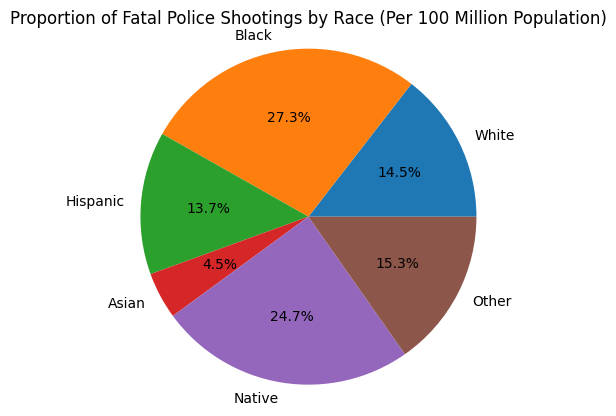

In [ ]:
# Define a dictionary to map single-letter race codes to full race names
race_mapping = {'W': 'White', 'B': 'Black', 'A': 'Asian', 'N': 'Native', 'H': 'Hispanic', 'O': 'Other'}

# Apply the race mapping to the 'race' column of the dataframe
df['race'] = df['race'].apply(lambda x: race_mapping.get(x, x))

# Define the 2019 US population estimates by race
us_population = {'White': 0.603, 'Black': 0.134, 'Hispanic': 0.186, 'Asian': 0.059, 'Native': 0.009, 'Other': 0.009}

# Calculate the number of fatal police shootings by race
shootings_by_race = df['race'].value_counts()

# Calculate the proportion of fatal police shootings by race relative to the US population
shootings_proportion_by_race = {}

for race in shootings_by_race.index:
    proportion = shootings_by_race[race] / (us_population[race] * 328.2 * 1000000)
    shootings_proportion_by_race[race] = proportion

# Create a bar chart showing the proportion of fatal police shootings by race relative to the US population
plt.bar(shootings_proportion_by_race.keys(), shootings_proportion_by_race.values())
plt.title("Proportion of Fatal Police Shootings by Race (Per 100 Million Population)")
plt.xlabel("Race")
plt.ylabel("Proportion of Fatal Police Shootings")


plt.show()

# Create a pie chart showing the proportion of fatal police shootings by race relative to the US population
plt.pie(shootings_proportion_by_race.values(), labels=shootings_proportion_by_race.keys(), autopct='%1.1f%%')
plt.title("Proportion of Fatal Police Shootings by Race (Per 100 Million Population)")
plt.axis('equal')

plt.show()

### **Summary**

From the plots, we can conclude that black people where the most affected from fatal police shootings with a percentage of 28.1% followed by native with 25.4% and hispanics with 15.7%.

### **5.2 Investigate the distribution of shootings by state**

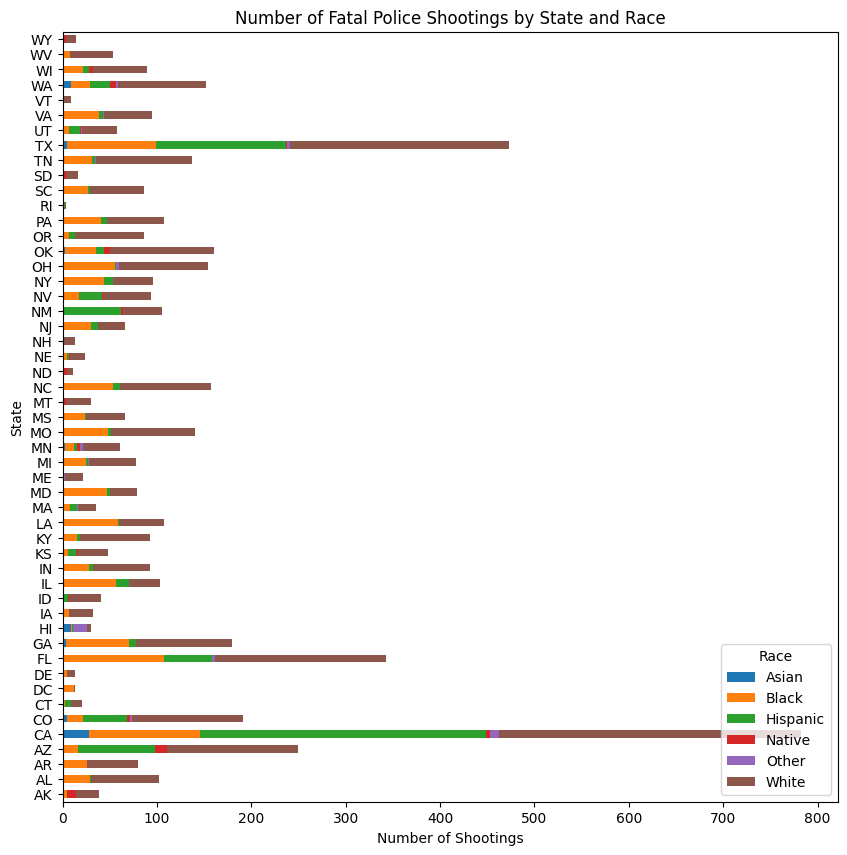

In [ ]:


# Group the data by state and race
state_race_counts = df.groupby(['state', 'race']).size().unstack(fill_value=0)

# Create a stacked bar chart showing the number of shootings by race in each state
fig, ax = plt.subplots(figsize=(10, 10))
state_race_counts.plot(kind='barh', stacked=True, ax=ax)
ax.set_title("Number of Fatal Police Shootings by State and Race")
ax.set_xlabel("Number of Shootings")
ax.set_ylabel("State")

# Add a legend for the race categories
ax.legend(title="Race", loc='lower right')

plt.show()


In [ ]:
# Group the data by state and count the number of shootings
state_counts = df.groupby(by='state').agg({'id' : 'count'}).reset_index()

# Define the choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=state_counts['state'],
    z = state_counts['id'],
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Deaths",
    zmin = 0,
    zmax = state_counts['id'].max(),
    marker_line_width=0.5,
))

# Add state annotations
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = [-117.23],
    lat = [32.82],
    text = ['California'],
    mode = 'text',
    showlegend = False,
    textfont = dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = [-99.9],
    lat = [31],
    text = ['Texas'],
    mode = 'text',
    showlegend = False,
    textfont = dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = [-81.51],
    lat = [27.66],
    text = ['Florida'],
    mode = 'text',
    showlegend = False,
    textfont = dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = [-111.89],
    lat = [34.22],
    text = ['Arizona'],
    mode = 'text',
    showlegend = False,
    textfont = dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = [-96.92],
    lat = [36.08],
    text = ['Oklahoma'],
    mode = 'text',
    showlegend = False,
    textfont = dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = [-80.79],
    lat = [35.78],
    text = ['North Carolina'],
    mode = 'text',
    showlegend = False,
    textfont = dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = [-105.35],
    lat = [39.11],
    text = ['Colorado'],
    mode = 'text',
    showlegend = False,
    textfont = dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = [-82.99],
    lat = [40.36],
    text = ['Ohio'],
    mode = 'text',
    showlegend = False,
    textfont = dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = [-83.44],
    lat = [33.24],
    text = ['Georgia'],
    mode = 'text',
    showlegend = False,
    textfont = dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = [-89.00],
    lat = [40.00],
    text = ['Illinois'],
    mode = 'text',
    showlegend = False,
    textfont = dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

# Define the layout of the map
fig.update_layout(
    title_text = 'Police Shooting Deaths by US States',
    geo_scope='usa',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=False,
        lakecolor='rgb(255, 255, 255)',
        landcolor='rgb(237, 247, 224)',
        subunitcolor='rgb(200, 200, 200)',
        countrycolor='rgb(200, 200, 200)',
        lonaxis=dict(range=[-125, -65]),
        lataxis=dict(range=[25, 50]),
        center=dict(lon=-95, lat=38),
        countrywidth=0.5,
        subunitwidth=0.5
    )
)



# save the plot as a PNG image
plt.savefig('map.png', dpi=100)

# Show the figure
fig.show()

<Figure size 640x480 with 0 Axes>

### **Summary**

Califonia is the state with the higest fatal police shootings, followed by Texas, Florida, and Arizona

### **5.3 Investigate the distribution of shootings by year**

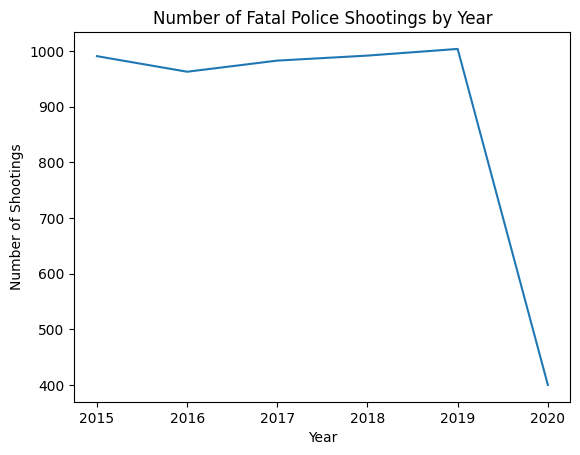

In [ ]:
# Extract year from date column
df['year'] = pd.DatetimeIndex(df['date']).year

# Group by year and count number of shootings
year_counts = df['year'].value_counts().sort_index()

# Create a line chart of shootings by year
plt.plot(year_counts.index, year_counts.values)
plt.title("Number of Fatal Police Shootings by Year")
plt.xlabel("Year")
plt.ylabel("Number of Shootings")
plt.xticks(year_counts.index)
plt.show('png')


### **Summary**

As we can see from the visualization fatal police shootings has been a big issue with at more than 900 victims involved

### **5.4 Investigate the distribution of shootings by city**

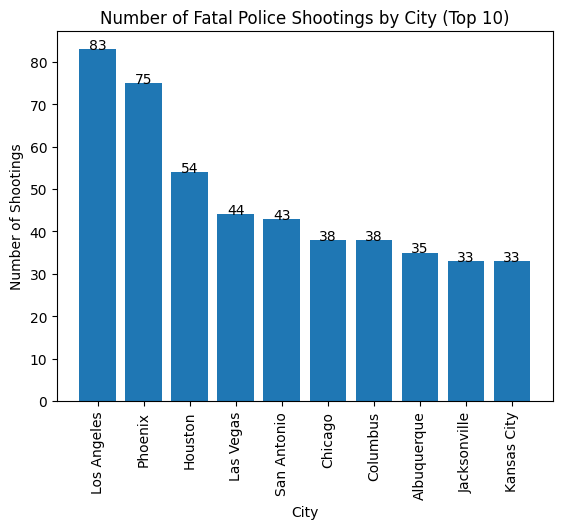

In [ ]:
# Create a bar chart of shootings by city
city_counts = df['city'].value_counts().head(10)
plt.bar(city_counts.index, city_counts.values)
plt.title("Number of Fatal Police Shootings by City (Top 10)")
plt.xlabel("City")
plt.ylabel("Number of Shootings")
plt.xticks(rotation=90)

# Add annotations to the bars
for i, v in enumerate(city_counts.values):
    plt.text(i, v, str(v), color='black', ha="center")

plt.show()


### **Summary**

The city of Los Angeles leads with the number of deaths as a result of police shootings. It has 31, followed by Phoenix with 24, Huston with 24, and Chicago with 23. This could indicate that there may be issues related to police use of force or other underlying factors that contribute to police shootings in these cities.

### **5.5 Explore the relationship between age and race**

In [ ]:
import plotly.express as px

fig = px.scatter(df, x='age', y='race', color='race',
                 hover_data=['name', 'gender', 'armed', 'state'],
                 title='Relationship Between Age and Race')
fig.show()


In [ ]:
fig = px.scatter(df, x='race', y='age')
fig.show()


### **Summary**

We can see that the age distribution is relatively consistent across different races, with some variation in the age. This suggests that age may not be a significant factor in determining the likelihood of a fatal police shooting based on race.

### **5.6 Investigate the distribution of gender in the dataset**

In [ ]:

gender_counts = df['gender'].value_counts()

fig = go.Figure(data=[go.Pie(labels=gender_counts.index, values=gender_counts.values)])
fig.update_traces(hoverinfo='label+value', textinfo='percent+label', textfont_size=14,
                  marker=dict(colors=['royalblue','orange'], line=dict(color='#000000', width=1.5)))

annotations = [dict(text='Gender', x=0.5, y=0.5, font=dict(size=20, color='black'), showarrow=False)]
fig.update_layout(annotations=annotations)

fig.show()


### **Summary**

The analysis of the distribution of gender in the dataset shows that:

The majority of the individuals involved in fatal police shootings were male, with a proportion of 95.6%.
The remaining 4.39% of individuals were female.
This suggests that there is a significant gender disparity in fatal police shootings, with men being much more likely to be involved in such incidents than women.

### **5.7 Explore the relationship between gender and the manner of death**

In [ ]:
gender_manner_counts = df.groupby(['gender', 'manner_of_death']).size().reset_index(name='counts')

fig = px.bar(gender_manner_counts, x='gender', y='counts', color='manner_of_death',
             barmode='group', title='Gender vs. Manner of Death')

fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Counts',
    legend_title='Manner of Death',
    annotations=[dict(x='female', y=350, text='Total Females: 112', showarrow=False),
                 dict(x='male', y=1000, text='Total Males: 3086', showarrow=False)]
)

fig.show()


### **Summary**

The resulting chart shows the number of shootings for each gender and manner of death. We can see that males are involved in more shootings overall, and the proportion of shootings that end in being shot and tasered is also higher for males. This suggests that there may be some gender differences in the use of less lethal force by police.

### **5.8 Investigate the distribution of mental illness in the dataset**

In [ ]:
mental_illness_counts = df['signs_of_mental_illness'].value_counts()
fig = px.pie(names=mental_illness_counts.index, values=mental_illness_counts.values)
fig.show()

### **Summary**

From the pie chart, we can see that a majority of the incidents in the dataset did not involve signs of mental illness, with only about 22% of incidents indicating signs of mental illness. This suggests that while mental illness can be a contributing factor in fatal police shootings, it is not the primary factor in the majority of cases.

### **5.9 Explore the relationship between mental illness and the manner of death**

In [ ]:
mi_md_count = df.groupby(['signs_of_mental_illness', 'manner_of_death']).size().reset_index(name='count')
fig = px.bar(mi_md_count, x='signs_of_mental_illness', y='count', color='manner_of_death',
             title='Relationship between Mental Illness and Manner of Death', barmode='group')
fig.update_layout(xaxis_title='Mental Illness', yaxis_title='Count')
fig.show()

### **Summary**

From the chart, we can see that for both cases where the individual had signs of mental illness and where they did not, the majority of deaths were caused by gunshot. However, there are a higher proportion of deaths caused by "Other" and "Taser" in cases where the individual had signs of mental illness compared to cases where they did not.

It's important to note that this chart only shows the relationship between mental illness and manner of death, and does not imply causation.

## **5.10 Which of the features are positively correlated?**

<ipython-input-22-896ca1cac038>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



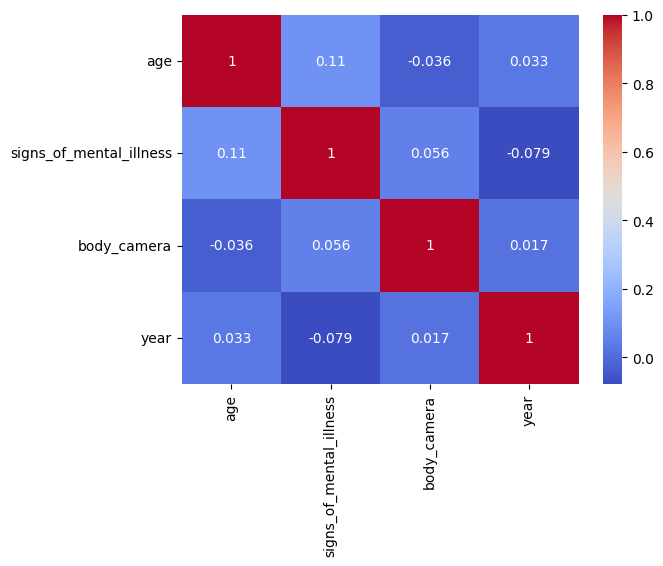

In [ ]:


# Compute the correlation matrix without the 'id' column
corr = df.drop('id', axis=1).corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


### **Summary**

From the heatmap, the correlation coefficient of 0.11 between age and signs of mental illness suggests positive correlation.

### **5.11 How many people got shot with or without police wearing a bodycam**

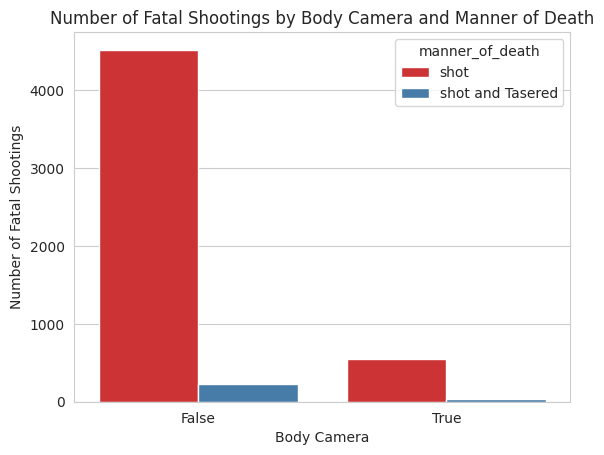

In [ ]:
# Create a bar plot
sns.countplot(x='body_camera', hue='manner_of_death', data=df)

# Add labels and title
plt.title('Number of Fatal Shootings by Body Camera and Manner of Death')
plt.xlabel('Body Camera')
plt.ylabel('Number of Fatal Shootings')

plt.show()

### **Summary**

Less than a thousand people got shot or tasered by the police wearing a body cam.   

## **5.12 Create a model to predict the age of individuals involved in police shootings**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# load the data
data = df

# create X and y
X = data[['gender', 'race', 'signs_of_mental_illness', 'armed', 'state']]
y = data['age']

# encode categorical variables
X = pd.get_dummies(X, columns=['gender', 'race', 'armed', 'state'], drop_first=True)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define random forest models with different hyperparameters
models = [
    RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42),
]

# fit the models to the training data and evaluate performance
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'Model {i+1}:')
    print(f'  Mean Absolute Error: {mae:.2f}')
    print(f'  Mean Squared Error: {mse:.2f}')
    print(f'  R-squared: {r2:.2f}')
    print(f'  5-fold Cross Validation Scores: {cv_scores}')


Model 1:
  Mean Absolute Error: 9.51
  Mean Squared Error: 145.62
  R-squared: 0.09
  5-fold Cross Validation Scores: [0.07935362 0.09267722 0.08949016 0.10539259 0.10075673]
Model 2:
  Mean Absolute Error: 9.55
  Mean Squared Error: 148.17
  R-squared: 0.08
  5-fold Cross Validation Scores: [0.0643867  0.07968871 0.0768703  0.09322031 0.09667122]
Model 3:
  Mean Absolute Error: 9.65
  Mean Squared Error: 151.87
  R-squared: 0.06
  5-fold Cross Validation Scores: [0.03735065 0.06934462 0.0656871  0.07612374 0.08836787]


### **Summary**

Overall, we can see that Model 1 has the lowest MAE and MSE values and the highest R2 value, indicating better performance than the other two models.

In [ ]:
for i in range(10):
    print(f'Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}')


Actual: 39.0, Predicted: 36.423055942879756
Actual: 35.0, Predicted: 33.707107021971346
Actual: 33.0, Predicted: 32.75674901884167
Actual: 34.0, Predicted: 32.257265402571626
Actual: 40.0, Predicted: 33.40527717415506
Actual: 35.0, Predicted: 36.549135577782266
Actual: 65.0, Predicted: 40.94439588159494
Actual: 34.0, Predicted: 38.782210655196806
Actual: 37.0, Predicted: 32.10226644833386
Actual: 38.0, Predicted: 31.86341842841164


### **Summary**

Looking at the predicted values for the test set, it seems that all three models tend to underestimate the actual values, as the predicted values are generally lower than the actual values. Also, it appears that the models may not be very accurate in predicting the target variable, and more work may need to be done to improve the models' performan

## **Main conclusions from the analysis**



1.    Persons of color have suffered more losses from fatal police shootings compared to the white population. The most affected races are the Blacks, Native Americans, and Hispanics.
2.   More people died in the state of Califonia as a result of fatal police shootings.
3. At least 900 people were victims of fatal police shootings every year between 2015 to 2020.
4. The city of Los Angeles leads with the number of deaths as a result of police shootings.
5. Similar probability of death as a result of police shootings for both old and young people.
6. Men are killed alot by police than women.
7. Males are shot and tasered more than women.
8. People were been shot and killed by the police wether they were mentally ill or not.
9. Both cases where the individual had signs of mental illness and where they did not, the majority of deaths were caused by gunshot.
10. People with signs of mental illness were mostly fatally shot by police and not tasered.
11. Body cam is effective in reducing deaths from police shootings
12. Predicted values were generally lower than the actual values, and need more work as to why this happened.



## **Suggestions**

Overall, the models were not able to make accurate predictions on the test data, there is need to investigate why it's making inaccurate predictions, and see if there are any improvements that I can make to the model.

## **Thank you**